In [50]:
import pandas as pd

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt


In [52]:
import numpy as np

In [53]:
import statsmodels.api as sm


In [54]:
from sklearn.preprocessing import StandardScaler


In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [56]:
from sklearn.model_selection import train_test_split

In [57]:
from sklearn.linear_model import LinearRegression


In [58]:
from sklearn.metrics import mean_absolute_error

In [59]:
from sklearn.metrics import mean_squared_error


In [60]:
from sklearn.metrics import mean_absolute_percentage_error

In [61]:
pd.set_option('display.max_columns', None)

In [62]:
df = pd.read_csv('/Users/barry/CodeAcademy/Ideal_dataset/hourly_csvs/hourly_47.csv')

In [63]:
from sklearn.metrics import r2_score


In [64]:
# def feature_choice(homeid):
#     df = pd.read_csv(f'/Users/barry/CodeAcademy/Ideal_dataset/hourly_csvs/hourly_{homeid}.csv')
#     df_features = df.iloc[:,1:]
#     target_col = df_features.pop('electric-combined')
#     df_features = df_features.assign(electric_combined= target_col)
#     corr_map(df_features)
#     multi_plot(df_features)
    
#     df_features.fillna(0, inplace=True)


#     return df_features
    

In [65]:
display(df.head())

,time,hot-water-hot-pipe,gas,central-heating-return,electric-combined,central-heating-flow,hot-water-cold-pipe,temperature_2m (°C),relative_humidity_2m (%),weather_code (wmo code),wind_speed_10m (km/h),wind_direction_10m (°),electric_combined_1h_lagged,electric_combined_1W_lagged,electric_combined_1W_lagged_avg,predicted_temperature_2m,predicted_weather_code,predicted_wind_speed,predicted_wind_direction,predicted_humidity,day,hour
0,2016-08-10 14:00:00,67257,0.0,32850.0,14986.0,32734.0,65220,12.6,79,51,13.3,237,18768.0,NaN,NaN,12.7,51.0,13.6,233.0,81.0,2,14
1,2016-08-10 15:00:00,66100,0.0,5720.0,15925.0,5720.0,64490,12.7,81,51,13.6,233,14986.0,NaN,NaN,12.6,51.0,14.8,221.0,85.0,2,15
2,2016-08-10 16:00:00,65445,0.0,0.0,35880.0,0.0,64495,12.6,85,51,14.8,221,15925.0,NaN,NaN,12.5,51.0,16.1,222.0,90.0,2,16
3,2016-08-10 17:00:00,66967,0.0,0.0,44094.0,0.0,66020,12.5,90,51,16.1,222,35880.0,NaN,NaN,12.7,53.0,17.0,234.0,94.0,2,17
4,2016-08-10 18:00:00,65003,0.0,0.0,36448.0,0.0,63710,12.7,94,53,17.0,234,44094.0,NaN,NaN,12.7,53.0,18.7,245.0,94.0,2,18


In [66]:
#df_features = df.iloc[:,1:]

In [67]:
# target_col = df_features.pop('electric_combined')
# df_features = df_features.assign(electric_combined=target_col)

In [68]:
def corr_map(df):
    corr = df.corr()
    electric_corr = corr[['electric_combined']].sort_values(by='electric_combined', ascending=False)

    plt.figure(figsize=(10, 8))
    sns.heatmap(electric_corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
    plt.show()



In [69]:
def pipe_v_electric(df, axs=None):
    sns.scatterplot(x='hot-water-hot-pipe',
                    y='electric_combined',
                    data=df,
                    hue='electric_combined',
                    palette='coolwarm',
                    ax=axs,
                    legend=False,
                    alpha=0.5)
    


In [70]:
def lagged_v_electric(df, axs=None):
    sns.scatterplot(x='electric_combined_1h_lagged',
                    y='electric_combined',
                    data=df,
                    hue='electric_combined',
                    palette='coolwarm',
                    ax=axs,
                    legend=False,
                    alpha = 0.5)


In [71]:
def hour_v_electric(df, axs=None):
    sns.scatterplot(x='hour',
                    y='electric_combined',
                    data=df,
                    hue='electric_combined',
                    palette='coolwarm',
                    ax=axs,
                    alpha = 0.5)


In [72]:
def day_v_electric(df, axs=None):
    sns.scatterplot(x='day',
                    y='electric_combined',
                    data=df,
                    hue='electric_combined',
                    palette='coolwarm',
                    ax=axs,
                    legend=False,
                    alpha = 0.5)


In [73]:
def gas_v_electric(df, axs=None):
    sns.scatterplot(x='gas',
                    y='electric_combined',
                    data=df,
                    hue='electric_combined',
                    palette='coolwarm',
                    ax=axs,
                    legend=False,
                    alpha = 0.5)
    


In [74]:
def lagged1W_v_electric(df, axs=None):
    fig1 = sns.scatterplot(x='electric_combined_1W_lagged',
                            y='electric_combined', 
                            data=df, hue='electric_combined',
                            palette='coolwarm',
                            ax=axs,
                            legend=True,
                            alpha = 0.5)
  


In [75]:
def heating_v_electric(df, axs=None):
    fig1 = sns.scatterplot(x='gas',
                            y='central-heating-flow', 
                            data=df, hue='electric_combined',
                            palette='coolwarm',
                            ax=axs,
                            legend=True,
                            alpha = 0.5)
  


In [76]:
def multi_plot(df):
    fig, axs = plt.subplots(2, 3, figsize=(20, 10))
    plt.suptitle('Scatter Plots of Features vs Electric Combined')
    try:
        fig1= lagged1W_v_electric(df, axs[0,0])
        axs[0,0].set_title('Electric Combined vs Electric Combined 1 Week Lagged')
    except:
        pass
    try:
        fig2 = pipe_v_electric(df, axs[0,1])
        axs[0,1].set_title('Hot Water Hot Pipe vs Electric Combined')
    except:
        pass
    try:
        fig3 = lagged_v_electric(df, axs[0,2])
        axs[0,2].set_title('Electric Combined vs Electric Combined 1 Hour Lagged')
    except:
        pass
    try:
        fig4 = hour_v_electric(df, axs[1,0])
        axs[1,0].set_title('Hour vs Electric Combined')
    except:
        pass
    try:
        fig5 = day_v_electric(df, axs[1,1])
        axs[1,1].set_title('Day vs Electric Combined')
    except:
        pass
    try:
        fig6 = gas_v_electric(df, axs[1,2])
        axs[1,2].set_title('Gas vs Electric Combined')
    except:
       pass

    plt.tight_layout()



In [77]:
# fig, axs = plt.subplots(2, 3, figsize=(20, 10))
# plt.suptitle('Scatter Plots of Features vs Electric Combined')

# fig1= lagged1W_v_electric(df_features, axs[0,0])
# axs[0,0].set_title('Electric Combined vs Electric Combined 1 Week Lagged')
# fig2 = pipe_v_electric(df_features, axs[0,1])
# axs[0,1].set_title('Hot Water Hot Pipe vs Electric Combined')
# fig3 = lagged_v_electric(df_features, axs[0,2])
# axs[0,2].set_title('Electric Combined vs Electric Combined 1 Hour Lagged')
# fig4 = hour_v_electric(df_features, axs[1,0])
# axs[1,0].set_title('Hour vs Electric Combined')
# fig5 = day_v_electric(df_features, axs[1,1])
# axs[1,1].set_title('Day vs Electric Combined')
# fig6 = gas_v_electric(df_features, axs[1,2])
# axs[1,2].set_title('Gas vs Electric Combined')

# plt.tight_layout()



In [78]:
def feature_choice(homeid):
    df = pd.read_csv(f'/Users/barry/CodeAcademy/Ideal_dataset/hourly_csvs/hourly_{homeid}.csv')
    df_features = df.iloc[:,1:]
    target_col = df_features.pop('electric-combined')
    df_features = df_features.assign(electric_combined= target_col)
    corr_map(df_features)
    multi_plot(df_features)
    
    df_features.fillna(0, inplace=True)


    return df_features
    

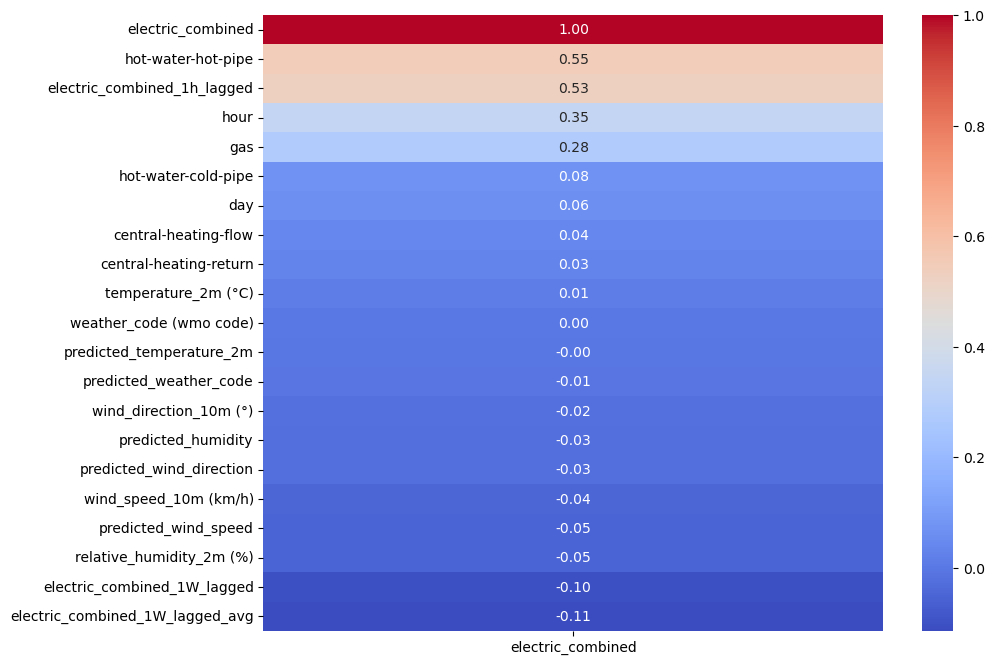

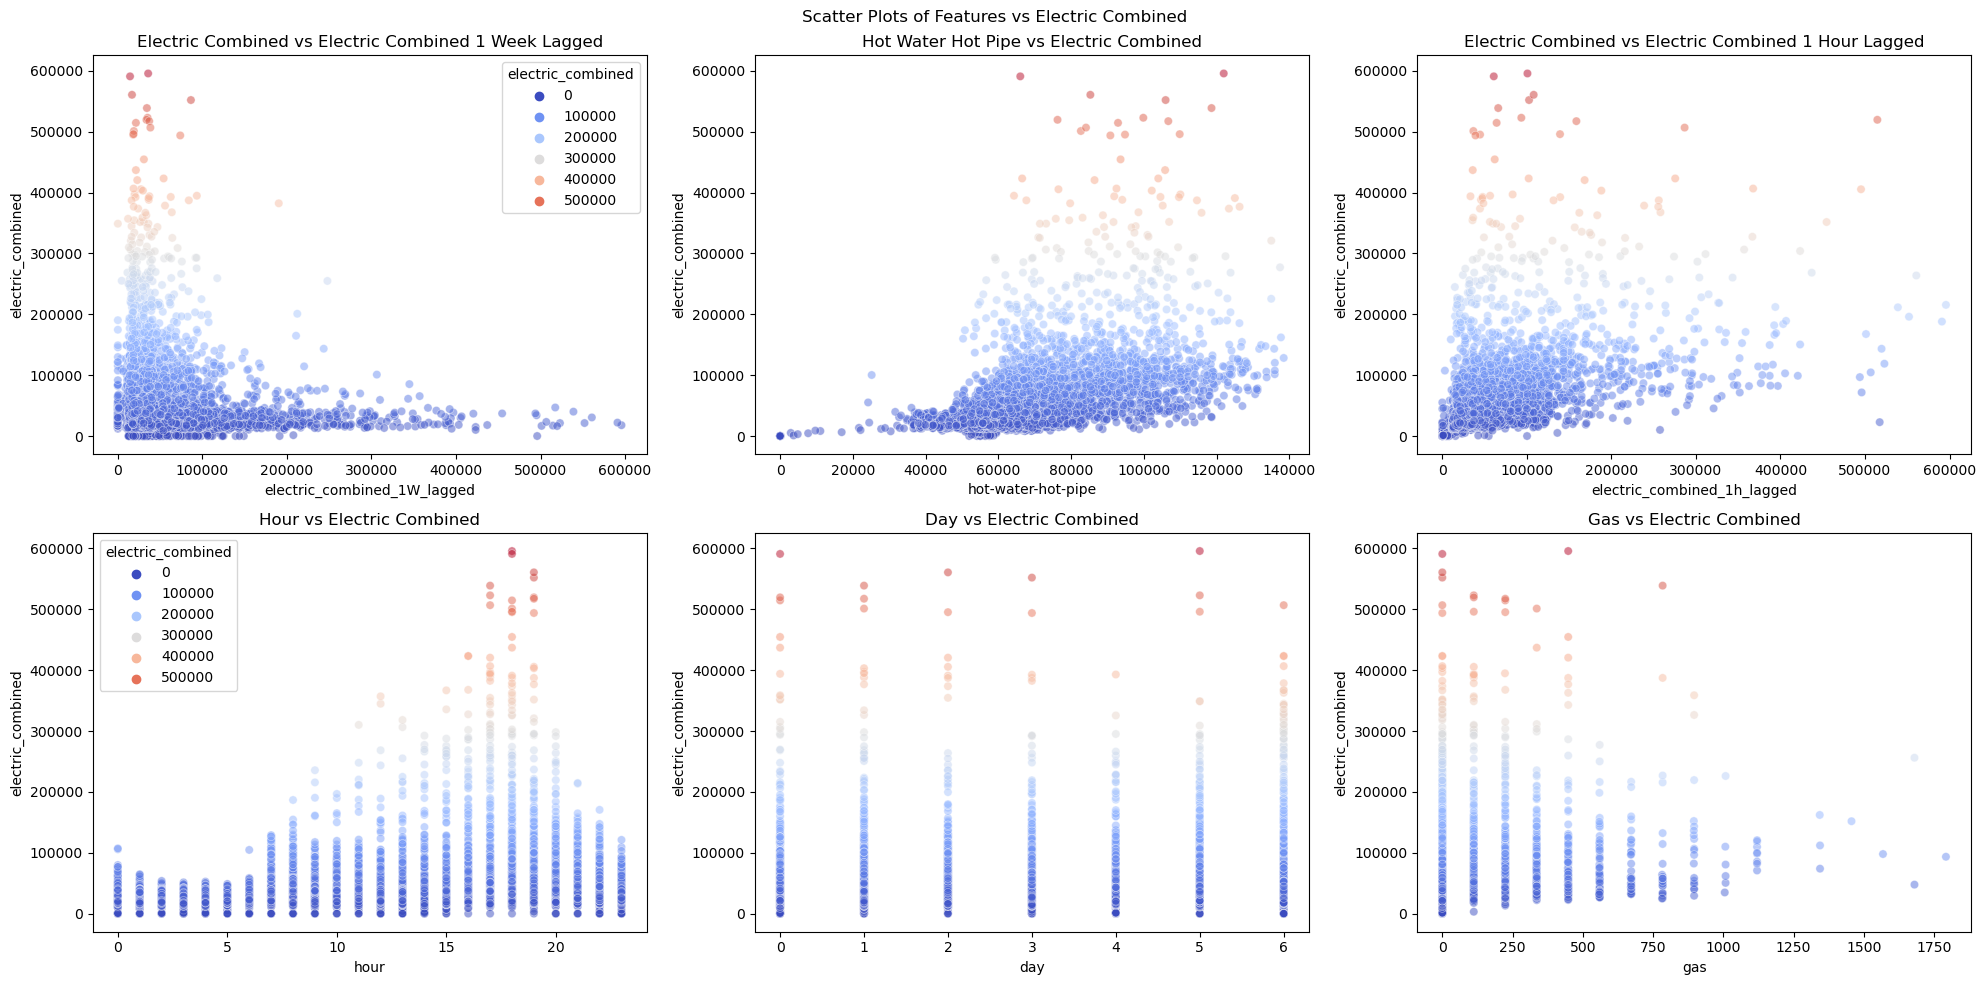

In [79]:
df_features = feature_choice(47)

### lets comput vif

In [80]:
print(df.columns)

Index(['time', 'hot-water-hot-pipe', 'gas', 'central-heating-return',
       'electric-combined', 'central-heating-flow', 'hot-water-cold-pipe',
       'temperature_2m (°C)', 'relative_humidity_2m (%)',
       'weather_code (wmo code)', 'wind_speed_10m (km/h)',
       'wind_direction_10m (°)', 'electric_combined_1h_lagged',
       'electric_combined_1W_lagged', 'electric_combined_1W_lagged_avg',
       'predicted_temperature_2m', 'predicted_weather_code',
       'predicted_wind_speed', 'predicted_wind_direction',
       'predicted_humidity', 'day', 'hour'],
      dtype='object')


In [81]:
feature_list = ['hot-water-hot-pipe', 'gas', 'central-heating-return',
       'central-heating-flow', 'hot-water-cold-pipe',
       'temperature_2m (°C)', 'relative_humidity_2m (%)','wind_speed_10m (km/h)','electric_combined_1h_lagged',
       'electric_combined_1W_lagged', 'predicted_temperature_2m','predicted_wind_speed','predicted_humidity', 'day', 'hour', 'weather_code (wmo code)']

### lets split out my X and Y. My Y is going to be electric_combined


In [82]:
# X = df_features.copy(deep=True)
# y = df_features.pop('electric_combined')

In [83]:
# display(X.columns)

In [84]:
def compute_vif(df, feature_list):
    #make a deep copy of df
    df_copy = df.copy(deep=True)
    scaler = StandardScaler()
    scaler.fit(df_copy[feature_list])
    df_copy[feature_list] = scaler.transform(df_copy[feature_list])
    
    df_copy = df_copy[feature_list]

    df_copy['intercept'] = 1
    #display(df_copy.head())
    vif = pd.DataFrame()
    vif["variable"] = df_copy.columns


    columns_to_be_replaced = ['electric_combined_1W_lagged', 'predicted_temperature_2m', 'predicted_wind_speed', 'predicted_humidity', 'predicted_wind_direction']

    for col in columns_to_be_replaced:
      if col in feature_list:
        df_copy[col].replace([np.inf, -np.inf], np.nan, inplace=True)
        df_copy[col].fillna(df_copy[col].mean(), inplace=True)
      else:
         pass
   
    vif['vif'] = [variance_inflation_factor(df_copy.values, i) for i in list(range(df_copy.shape[1]))]
    vif = vif[vif['variable']!= 'intercept']
    print([vif.variable])
    return vif.sort_values(by='vif', ascending=True)



In [85]:
compute_vif(df_features, feature_list)

/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_11672/1332687126.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy[col].replace([np.inf, -np.inf], np.nan, inplace=True)
/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_11672/1332687126.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are sett

[0              hot-water-hot-pipe
1                             gas
2          central-heating-return
3            central-heating-flow
4             hot-water-cold-pipe
5             temperature_2m (°C)
6        relative_humidity_2m (%)
7           wind_speed_10m (km/h)
8     electric_combined_1h_lagged
9     electric_combined_1W_lagged
10       predicted_temperature_2m
11           predicted_wind_speed
12             predicted_humidity
13                            day
14                           hour
15        weather_code (wmo code)
Name: variable, dtype: object]


,variable,vif
13,day,1.023619
15,weather_code (wmo code),1.072922
9,electric_combined_1W_lagged,1.137809
1,gas,1.191829
4,hot-water-cold-pipe,1.345359
14,hour,1.389974
8,electric_combined_1h_lagged,1.452191
0,hot-water-hot-pipe,1.746800
2,central-heating-return,4.308822
3,central-heating-flow,4.312027


### the prediction ones are clearly fucking it up - so lets get rid of those iterativley

In [86]:
if 'predicted_temperature_2m' in feature_list:
    feature_list.remove('predicted_temperature_2m')
    feature_list_amended = feature_list
else:
    pass
compute_vif(df_features, feature_list_amended)

/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_11672/1332687126.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy[col].replace([np.inf, -np.inf], np.nan, inplace=True)
/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_11672/1332687126.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are sett

[0              hot-water-hot-pipe
1                             gas
2          central-heating-return
3            central-heating-flow
4             hot-water-cold-pipe
5             temperature_2m (°C)
6        relative_humidity_2m (%)
7           wind_speed_10m (km/h)
8     electric_combined_1h_lagged
9     electric_combined_1W_lagged
10           predicted_wind_speed
11             predicted_humidity
12                            day
13                           hour
14        weather_code (wmo code)
Name: variable, dtype: object]


,variable,vif
12,day,1.023608
14,weather_code (wmo code),1.072560
9,electric_combined_1W_lagged,1.118445
1,gas,1.191304
5,temperature_2m (°C),1.302096
4,hot-water-cold-pipe,1.345179
13,hour,1.357799
8,electric_combined_1h_lagged,1.443813
0,hot-water-hot-pipe,1.739140
2,central-heating-return,4.305655


In [87]:
if 'predicted_wind_speed' in feature_list:
    feature_list.remove('predicted_wind_speed')
    feature_list_amended = feature_list
else:
    pass
compute_vif(df_features, feature_list_amended)

[0              hot-water-hot-pipe
1                             gas
2          central-heating-return
3            central-heating-flow
4             hot-water-cold-pipe
5             temperature_2m (°C)
6        relative_humidity_2m (%)
7           wind_speed_10m (km/h)
8     electric_combined_1h_lagged
9     electric_combined_1W_lagged
10             predicted_humidity
11                            day
12                           hour
13        weather_code (wmo code)
Name: variable, dtype: object]


/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_11672/1332687126.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy[col].replace([np.inf, -np.inf], np.nan, inplace=True)
/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_11672/1332687126.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are sett

,variable,vif
11,day,1.023229
13,weather_code (wmo code),1.072344
9,electric_combined_1W_lagged,1.117944
1,gas,1.191029
7,wind_speed_10m (km/h),1.201661
5,temperature_2m (°C),1.301845
4,hot-water-cold-pipe,1.344888
12,hour,1.354164
8,electric_combined_1h_lagged,1.443746
0,hot-water-hot-pipe,1.738737


In [88]:
if 'predicted_humidity' in feature_list:
    feature_list.remove('predicted_humidity')
    feature_list_amended = feature_list
else:
    pass
compute_vif(df_features, feature_list_amended)

/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_11672/1332687126.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy[col].replace([np.inf, -np.inf], np.nan, inplace=True)
/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_11672/1332687126.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are sett

[0              hot-water-hot-pipe
1                             gas
2          central-heating-return
3            central-heating-flow
4             hot-water-cold-pipe
5             temperature_2m (°C)
6        relative_humidity_2m (%)
7           wind_speed_10m (km/h)
8     electric_combined_1h_lagged
9     electric_combined_1W_lagged
10                            day
11                           hour
12        weather_code (wmo code)
Name: variable, dtype: object]


,variable,vif
10,day,1.023226
12,weather_code (wmo code),1.068136
9,electric_combined_1W_lagged,1.104361
1,gas,1.191001
7,wind_speed_10m (km/h),1.195474
6,relative_humidity_2m (%),1.218640
5,temperature_2m (°C),1.301615
11,hour,1.321761
4,hot-water-cold-pipe,1.343396
8,electric_combined_1h_lagged,1.440547


### logicallly i dont think i need more than one central-heating measure. And they are on the high end of moderatly correlated

In [89]:
if 'central-heating-return' in feature_list:
    feature_list.remove('central-heating-return')
    feature_list_amended = feature_list
else:
    pass
compute_vif(df_features, feature_list_amended)

[0              hot-water-hot-pipe
1                             gas
2            central-heating-flow
3             hot-water-cold-pipe
4             temperature_2m (°C)
5        relative_humidity_2m (%)
6           wind_speed_10m (km/h)
7     electric_combined_1h_lagged
8     electric_combined_1W_lagged
9                             day
10                           hour
11        weather_code (wmo code)
Name: variable, dtype: object]


/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_11672/1332687126.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy[col].replace([np.inf, -np.inf], np.nan, inplace=True)
/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_11672/1332687126.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are sett

,variable,vif
2,central-heating-flow,1.010088
9,day,1.022504
11,weather_code (wmo code),1.068120
8,electric_combined_1W_lagged,1.104360
1,gas,1.190930
6,wind_speed_10m (km/h),1.195301
5,relative_humidity_2m (%),1.215939
4,temperature_2m (°C),1.301590
10,hour,1.321665
3,hot-water-cold-pipe,1.343153


### That looks really good.

Select variables that meaningfully predict outcome


In [90]:
X = df_features.copy(deep=True)
y = df_features.pop('electric_combined')

In [91]:
X_opt = df_features.copy(deep= True)
X_opt = X_opt[feature_list_amended]

scaler = StandardScaler()
scaler.fit(X_opt[feature_list_amended])
X_opt[feature_list_amended] = scaler.transform(X_opt[feature_list_amended])

In [92]:


      
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      electric_combined   R-squared (uncentered):                   0.240
Model:                            OLS   Adj. R-squared (uncentered):              0.239
Method:                 Least Squares   F-statistic:                              171.1
Date:                Thu, 28 Mar 2024   Prob (F-statistic):                        0.00
Time:                        15:43:58   Log-Likelihood:                         -81481.
No. Observations:                6507   AIC:                                  1.630e+05
Df Residuals:                    6495   BIC:                                  1.631e+05
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
hot-water-hot-pipe            2.28e+04   1084.148     21.031      0.000    2.07e+04    2.49e+04
gas                          5536.3814    898.816      6.160      0.000    3774.406    7298.356
central-heating-flow         -183.8141    827.765     -0.222      0.824   -1806.507    1438.879
hot-water-cold-pipe         -6957.6942    954.532     -7.289      0.000   -8828.890   -5086.498
temperature_2m (°C)         -1136.1835    939.647     -1.209      0.227   -2978.201     705.834
relative_humidity_2m (%)    -1833.5268    908.204     -2.019      0.044   -3613.906     -53.147
wind_speed_10m (km/h)        -979.4814    900.464     -1.088      0.277   -2744.687     785.724
electric_combined_1h_lagged  1.639e+04    988.531     16.581      0.000    1.45e+04    1.83e+04
electric_combined_1W_lagged   667.3516    865.532      0.771      0.441   -1029.375    2364.078
day                          1738.0265    832.837      2.087      0.037     105.391    3370.662
hour                         6669.4785    946.866      7.044      0.000    4813.310    8525.647
weather_code (wmo code)       592.0391    851.212      0.696      0.487   -1076.616    2260.694
==============================================================================
Omnibus:                     5871.195   Durbin-Watson:                   0.777
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           277322.672
Skew:                           4.222   Prob(JB):                         0.00
Kurtosis:                      33.847   Cond. No.                         2.38
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Central-heating-flow is high.... 
As is 1W lagged but but taht is useful and historic so keeping it
Weather code being high is also very useful

In [93]:
desired_features = ['hot-water-hot-pipe','gas','central-heating-flow','hot-water-cold-pipe',
 'temperature_2m (°C)','relative_humidity_2m (%)','wind_speed_10m (km/h)',
'electric_combined_1h_lagged','electric_combined_1W_lagged','day','hour','weather_code (wmo code)']

In [94]:
# def forecast():
#     #lets add my time series info to the dataframe
#     desired_features = ['hot-water-hot-pipe','gas','central-heating-flow','hot-water-cold-pipe',
#     'temperature_2m (°C)','relative_humidity_2m (%)','wind_speed_10m (km/h)',
#     'electric_combined_1h_lagged','electric_combined_1W_lagged','day','hour','weather_code (wmo code)']


#     X = df_features[desired_features]
#     X.dropna(inplace=True)


#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=60, shuffle=False)

#     model =LinearRegression()
#     model.fit(X_train,y_train)
#     y_pred = pd.Series(model.predict(X_train), index = y_train.index)
#     y_fore = pd.Series(model.predict(X_test), index = y_test.index)
#     plot_data = pd.DataFrame(columns=['y_test', 'y_fore'])

#     plot_data['y_test'] = y_test
#     plot_data['y_fore'] = y_fore

#     org_csv = pd.read_csv('/Users/barry/CodeAcademy/Ideal_dataset/hourly_csvs/hourly_47.csv')
#     org_csv = org_csv['time']

#     plot_data['time'] = org_csv
#     plot_data.set_index('time', inplace=True)
#     display(plot_data.head())

#     fig, axs = plt.subplots(figsize=(20,10))
#     fig1 = sns.lineplot(data=plot_data, ax=axs)
#     plt.xticks(ticks= plot_data.index, rotation=90)
#     # ax = y_test.plot()
#     # _ = y_fore.plot(ax=ax, color = 'red')
#     print(f'contrasting y_test with y_fore for the last 60 hours')

In [95]:
org_csv = pd.read_csv('/Users/barry/CodeAcademy/Ideal_dataset/hourly_csvs/hourly_47.csv')
org_csv = org_csv['time']
display(org_csv.tail())

6502    2017-05-08 12:00:00
6503    2017-05-08 13:00:00
6504    2017-05-08 14:00:00
6505    2017-05-08 15:00:00
6506    2017-05-08 16:00:00
Name: time, dtype: object

In [96]:
def forecast(homeid):
    #lets add my time series info to the dataframe
    desired_features = ['hot-water-hot-pipe','gas','central-heating-flow','hot-water-cold-pipe',
    'temperature_2m (°C)','relative_humidity_2m (%)','wind_speed_10m (km/h)',
    'electric_combined_1h_lagged','electric_combined_1W_lagged','day','hour','weather_code (wmo code)']
    df = pd.read_csv(f'/Users/barry/CodeAcademy/Ideal_dataset/hourly_csvs/hourly_{homeid}.csv')
    df.dropna(inplace=True)

    y = df.pop('electric-combined')


    X = df[desired_features]


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=96, shuffle=False)

    model =LinearRegression()
    model.fit(X_train,y_train)
    #y_pred = pd.Series(model.predict(X_train), index = y_train.index)
    y_fore = pd.Series(model.predict(X_test), index = y_test.index)
    
    plot_data = pd.DataFrame(columns=['y_test', 'y_fore'])

    plot_data['y_test'] = y_test
    plot_data['y_fore'] = y_fore

    org_csv = pd.read_csv(f'/Users/barry/CodeAcademy/Ideal_dataset/hourly_csvs/hourly_{homeid}.csv')

    
    org_csv = org_csv['time']

    plot_data['time'] = org_csv
    plot_data.set_index('time', inplace=True)
    
    fig, axs = plt.subplots(figsize=(20,10))
    fig1 = sns.lineplot(data=plot_data, ax=axs)
    plt.xticks(ticks= plot_data.index, rotation=90)
    axs.set_title(f'contrasting next hour prediciton with actuals over 7 days: homeid {homeid}')

    #lets check errors
    print(f'mean absolute error: {mean_absolute_error(y_test, y_fore)}')
    print(f'mean absolute percentage error: {mean_absolute_percentage_error(y_test, y_fore)}')
    print(f'R-squared error: {r2_score(y_test, y_fore)}')

    print('______________')

    svrgs_parameters = {
    'kernel': ['rbf'],
    'C':     [150000,200000,250000],
    'gamma': [0.004,0.0045,0.005]
}

    # svr_cv = GridSearchCV(svm.SVR(), svrgs_parameters, cv=8, scoring= 'neg_mean_squared_log_error')
    # svr_cv.fit(X_train, y_train)
    # prediction = svr_cv.predict(X_test)
    # print(f'mean absolute error: {mean_absolute_error(y_test, prediction)}')
    # print(f'R-squared error: {r2_score(y_test, prediction)}')
    


In [97]:
def combined_function(homeid):
    feature_choice(homeid)
    forecast(homeid)


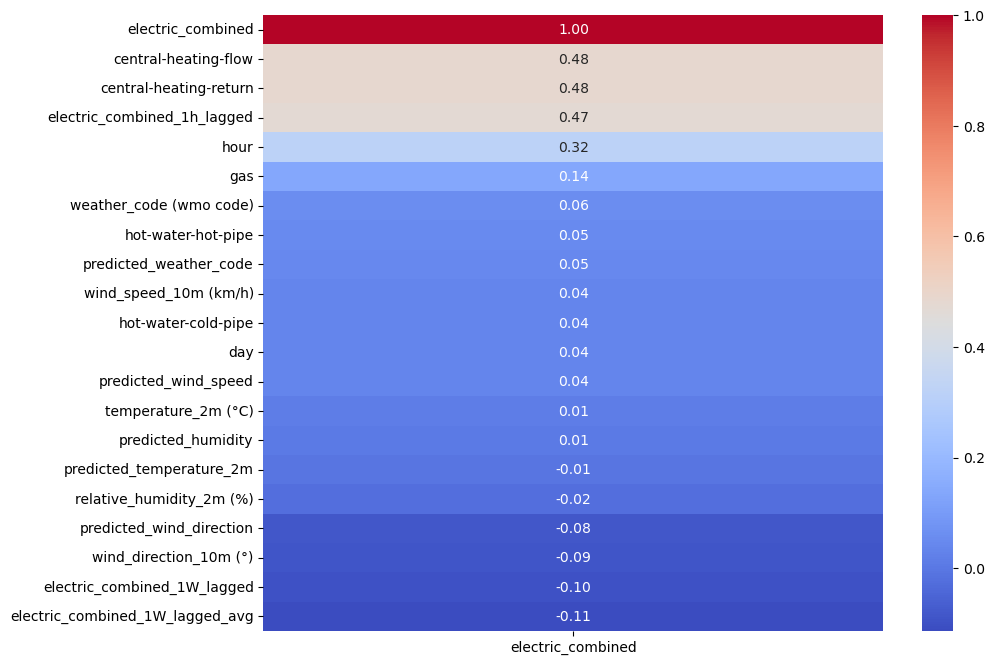

/Users/barry/anaconda3/envs/IdealDataInterface/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/barry/anaconda3/envs/IdealDataInterface/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


mean absolute error: 13938.531095108177
mean absolute percentage error: 8.927525095178757e+18
R-squared error: 0.23882784173413651
______________


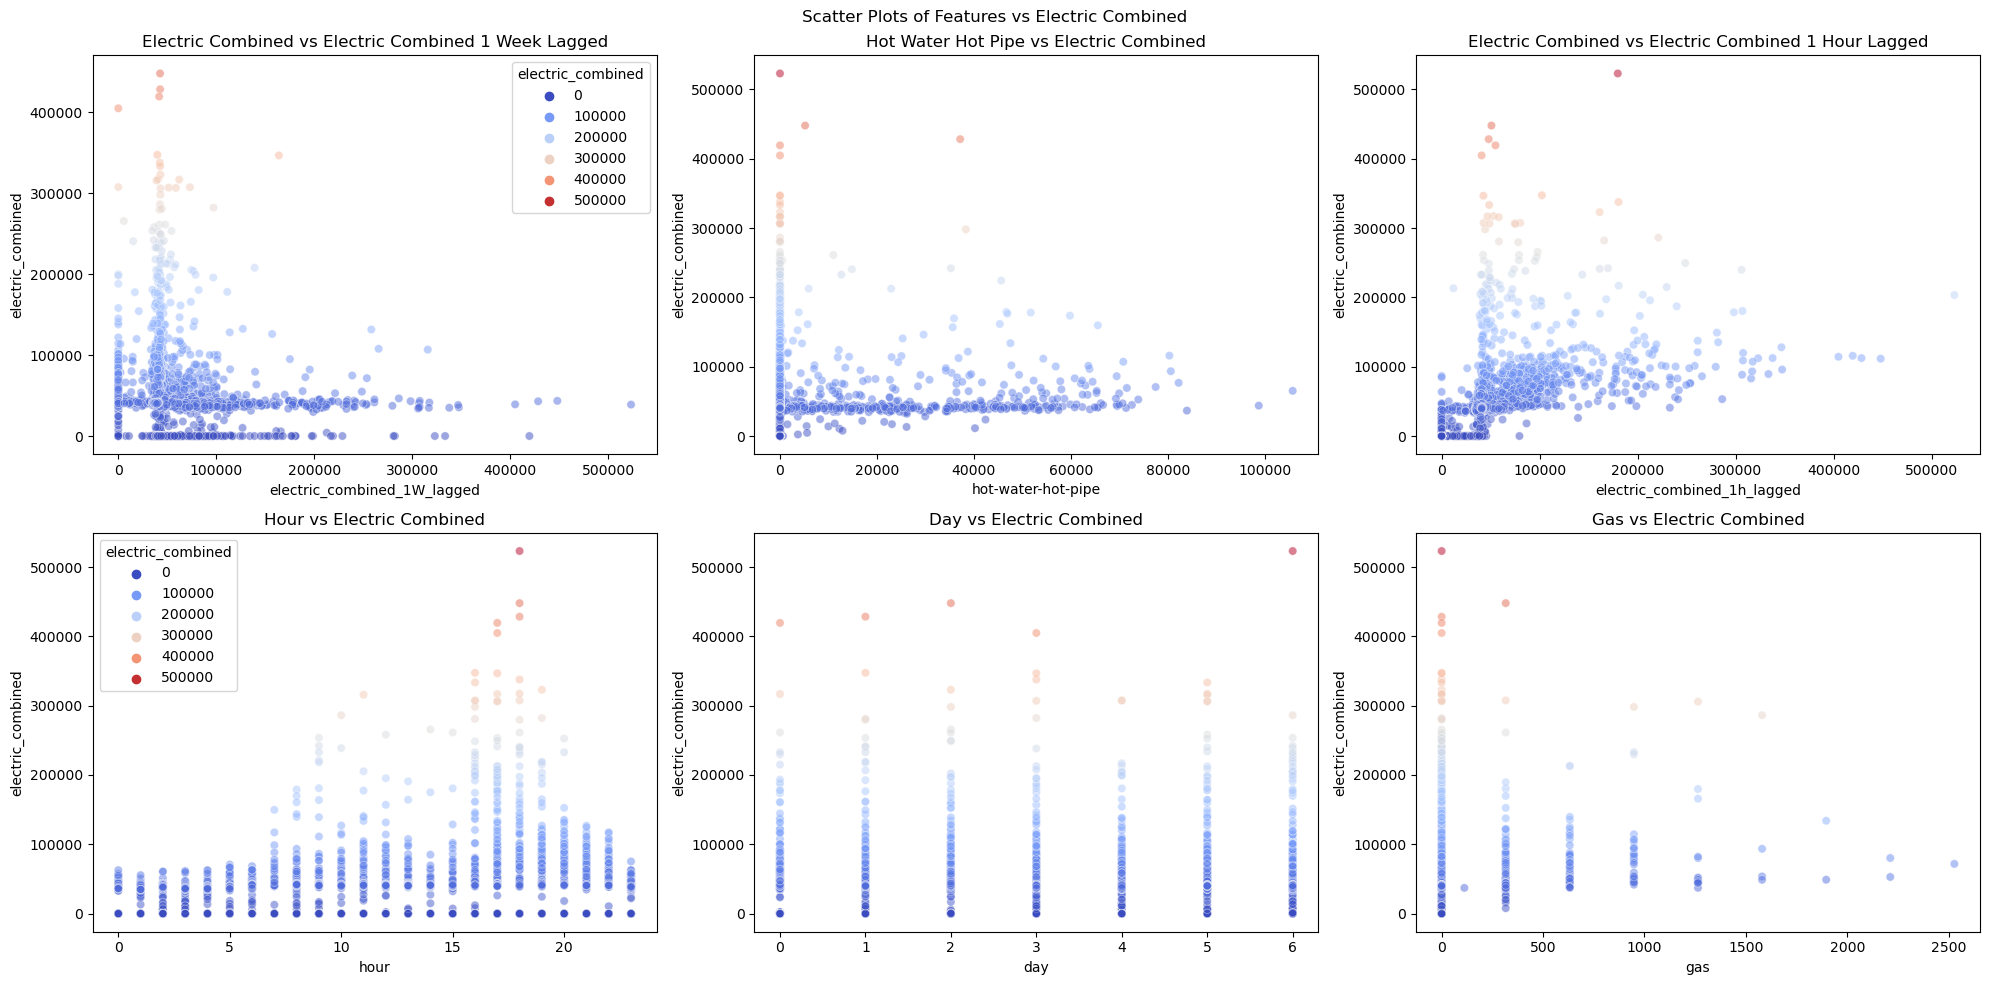

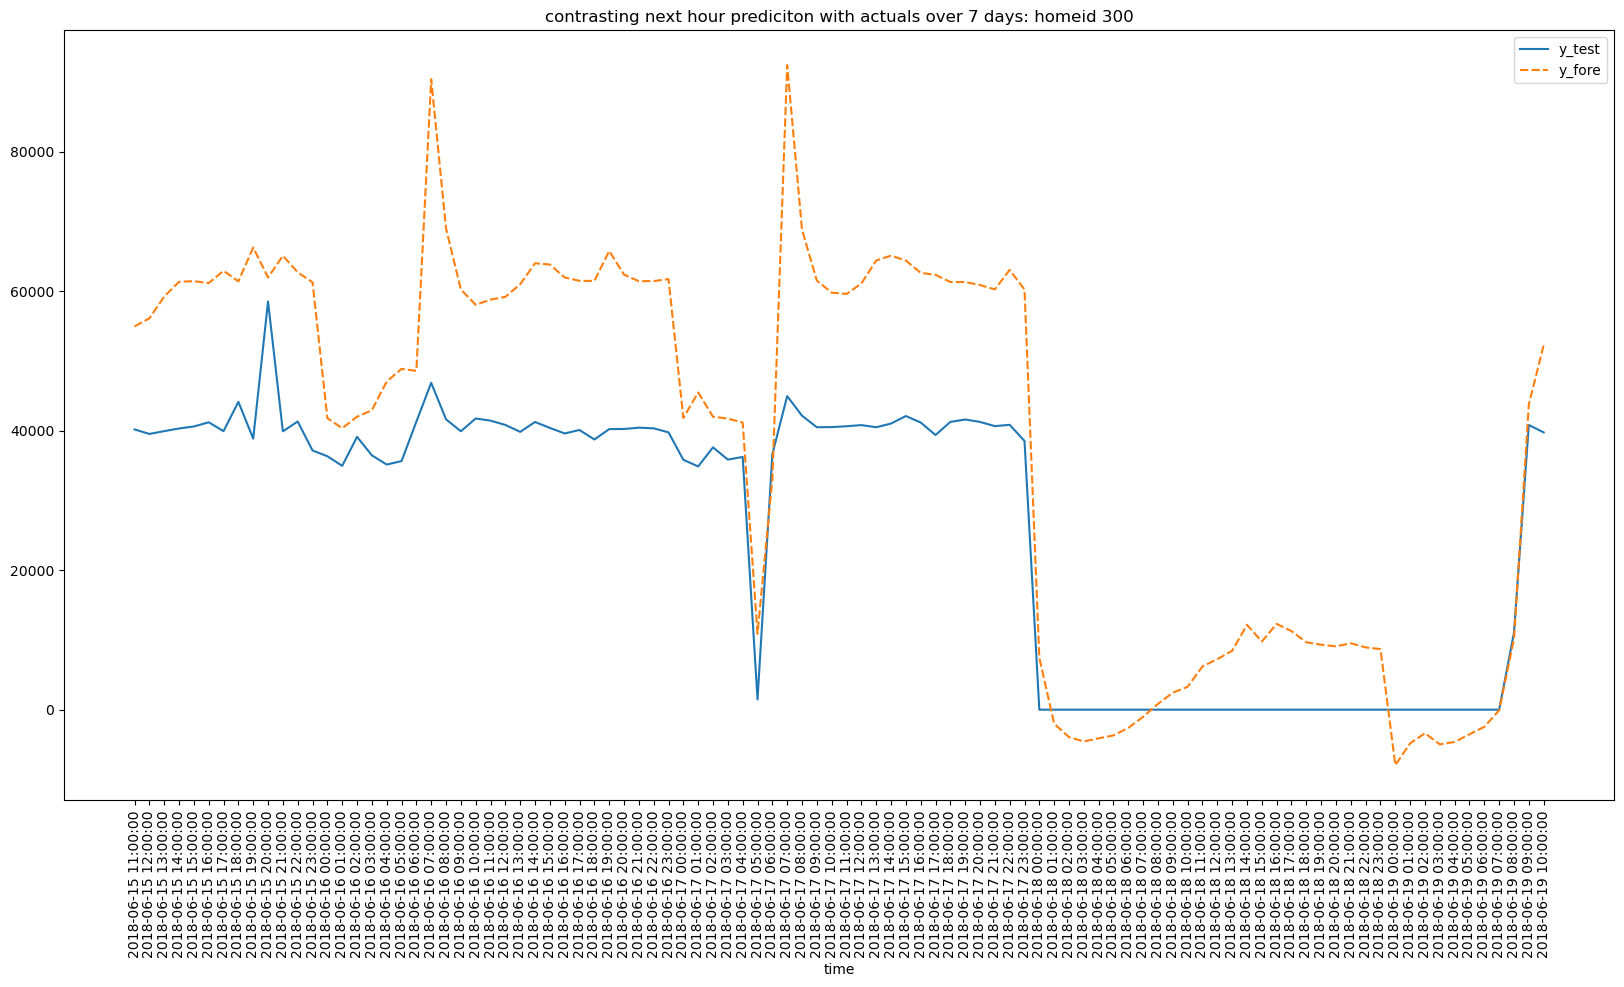

In [100]:
combined_function(300)